<a href="https://colab.research.google.com/github/HILALOZTEMEL/Pima-Indians-Diabetes-Dataset-With-Ai-Algorithm/blob/main/Pima_Indians_Diabetes_Dataset_With_Ai_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
file_path = "/content/drive/MyDrive/machinelearning/vize/veri-seti.txt"

# pandas kullanarak veri setini oku
df = pd.read_csv(file_path, header=None, sep='\t')
# Sütun adları listesi
columns_list = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skinfold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable (0 or 1)"
]

# Sütun adlarını değiştir
df.columns = columns_list
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
missing_value = df.isnull().sum()
print(missing_value)

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64


veri analizinin gerçekliğini korumak ve veri setinin tamamını temsil etmek için aykısı değerler silinmemiştir.

# **Min-Max Normalizasyonu**

Min-max scale kullanmamın sebebi ise lineer yapıyı bozmamak için yani, min-max ölçekleme işleminin verilerin orijinal lineer ilişkilerini değiştirmeyeceğini ifade eder.Veriler arasındaki oranlar ve uzaklıklar ölçekleme işleminden sonra da korunur.Min-max scaling (minimum-maksimum ölçekleme) verileri belirli bir aralıkta (genellikle 0 ile 1 arasında) lineer olarak dönüştürür.

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Normalized veriyi DataFrame'e çevir
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

df_normalized.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


# **PCA ve LDA algoritmaları**

In [ ]:
# PCA modelini oluştur ve uygula
pca = PCA(n_components=2)  # İki öz değeri seçiyoruz
pca_data = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
print("PCA Sonuçları:")
print(df_pca.head())

PCA Sonuçları:
        PC1       PC2
0  0.706994  0.153130
1 -0.402711 -0.088188
2  0.689631  0.104960
3 -0.419790 -0.195420
4  0.670742 -0.406714


In [ ]:
print("PCA Component Ratios:")
print(pca.explained_variance_ratio_)

PCA Component Ratios:
[0.55688605 0.13325266]


 veri setindeki iki bileşenle gerçeklerştirilen PCA ve elde edilen varyans oranları [0.55688605, 0.13325266] tir, ilk bileşen veri setindeki toplam varyansın yaklaşık %55.7'sini açıkladığını ve ikinci bileşenin ise yaklaşık %13.3'ünü açıkladığını gösterir.Daha yüksek oranlara sahip bileşenler, veri setinizde daha fazla varyansı temsil eder ve dolayısıyla daha fazla bilgiyi korur ve modelin performansını arttırır.

In [ ]:
lda = LDA(n_components= 1)
X = df.iloc[:, :-1]  # Son sütun hariç tüm sütunlar X'te
y = df.iloc[:, -1]   # Son sütun y olarak
lda_data = lda.fit_transform(X,y)
df_lda = pd.DataFrame(data=lda_data, columns=['LD1'])
print(df_lda.head())

        LD1
0  1.380247
1 -1.564524
2  1.766185
3 -1.690588
4  2.207268


In [ ]:
print("LDA Component Ratios:")
print(lda.explained_variance_ratio_)


LDA Component Ratios:
[1.]


Bir bileşen oranı 1 ise, bu bileşenin veri setindeki tüm sınıflar arasındaki ayrımı tam olarak ifade ettiği anlamına gelir.

In [ ]:
X = df_normalized.drop(columns=['Class variable (0 or 1)'])  # Bağımsız değişkenler
y = df_normalized['Class variable (0 or 1)']  # Bağımlı değişken

# Veri setini train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Çoklu Doğrusal Regresyon Analizi




In [ ]:
# Özet istatistikleri kontrol etme
print(df.describe())

       Number of times pregnant  \
count                768.000000   
mean                   3.845052   
std                    3.369578   
min                    0.000000   
25%                    1.000000   
50%                    3.000000   
75%                    6.000000   
max                   17.000000   

       Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
count                                         768.000000                          
mean                                          120.894531                          
std                                            31.972618                          
min                                             0.000000                          
25%                                            99.000000                          
50%                                           117.000000                          
75%                                           140.250000                          
max                 

* Class variable (0 or 1) = Kategorik veridir.( Bir aralığa sahip değildir. sadece 1 veya 0 değerini alır.)
* Age (years) = Kesikli bir veridir. Belirlenen gözlenme aralığında sadece tam sayıların yer aldığı veri setleridir.
* Diabetes pedigree function = Sürekli bir değişkendir. (min=0.07 max=2.42 belirli bir aralıkta değer alırlar ve kesirli bir ölçüm birimine sahiptirler.)
* Body mass index (weight in kg/(height in m)^2) = Sürekli bir değişkendir. (min=0.0 max=67.1 belirli bir aralıkta değer alırlar ve kesirli bir ölçüm birimine sahiptirler.)
* 2-Hour serum insulin (mu U/ml) = Kesikli bir veridir. Belirlenen gözlenme aralığında sadece tam sayıların yer aldığı veri setleridir.
* Triceps skinfold thickness (mm) = Kesikli bir veridir. Belirlenen gözlenme aralığında sadece tam sayıların yer aldığı veri setleridir.
* Diastolic blood pressure (mm Hg)) = Kesikli bir veridir. Belirlenen gözlenme aralığında sadece tam sayıların yer aldığı veri setleridir.
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test  = Kesikli bir veridir. Belirlenen gözlenme aralığında sadece tam sayıların yer aldığı veri setleridir.
* Number of times pregnant = Kesikli bir veridir. Belirlenen gözlenme aralığında sadece tam sayıların yer aldığı veri setleridir.

In [ ]:
# Çoklu Doğrusal Regresyon modelini oluştur ve eğit
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_linear = model_linear.predict(X_test)

# Model performansını değerlendir
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Çoklu Doğrusal Regresyon Modeli:")
print("MSE:", mse_linear)
print("R^2:", r2_linear)



Çoklu Doğrusal Regresyon Modeli:
MSE: 0.17603335005142037
R^2: 0.2224076496611056


# Multinominal Lojistik Regresyon Analizi

In [ ]:
# Multinominal Lojistik Regresyon modelini oluştur ve eğit
model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_logistic = model_logistic.predict(X_test)

# Model performansını değerlendir
print("Multinominal Lojistik Regresyon modeli:")
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred_logistic))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logistic).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)



Multinominal Lojistik Regresyon modeli:
Doğruluk Oranı: 0.7359307359307359

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       151
         1.0       0.63      0.57      0.60        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231


Confusion Matrix:
[[124  27]
 [ 34  46]]
Sensitivity (Duyarlılık): 0.575
Specificity (Özgünlük): 0.8211920529801324


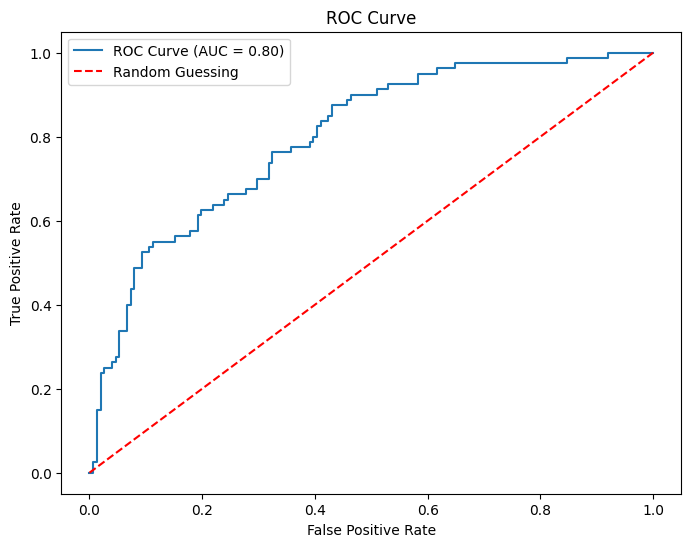

AUC Score: 0.7985099337748344


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi ve AUC hesaplama
probs = model_logistic.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", auc)

# Karar Ağacı Sınıflandırıcı modeli

**1. Karar Ağacı**

In [ ]:
# Karar Ağacı Sınıflandırıcı modelini oluştur ve eğit
model_tree = DecisionTreeClassifier(random_state=50)
model_tree.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_tree = model_tree.predict(X_test)
# Model performansını değerlendir
print("Karar Ağacı Sınıflandırıcı Modeli:")
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred_tree))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)

Karar Ağacı Sınıflandırıcı Modeli:
Doğruluk Oranı: 0.6883116883116883

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.74       151
         1.0       0.54      0.68      0.60        80

    accuracy                           0.69       231
   macro avg       0.67      0.69      0.67       231
weighted avg       0.71      0.69      0.69       231


Confusion Matrix:
[[105  46]
 [ 26  54]]
Sensitivity (Duyarlılık): 0.675
Specificity (Özgünlük): 0.695364238410596


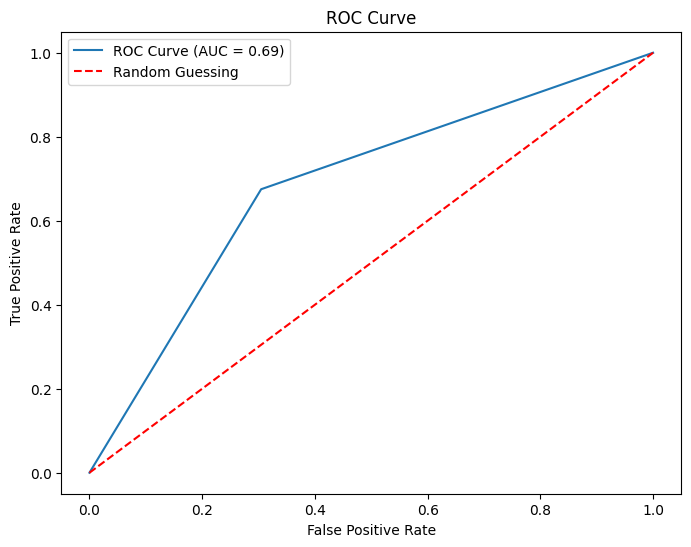

AUC Score: 0.685182119205298


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi ve AUC hesaplama
probs = model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", auc)

2. Karar Ağacı

In [ ]:
# Karar Ağacı Sınıflandırıcı modelini oluştur ve eğit
model_tree = DecisionTreeClassifier(random_state=12)
model_tree.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_tree = model_tree.predict(X_test)
# Model performansını değerlendir
print("Karar Ağacı Sınıflandırıcı Modeli:")
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred_tree))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)

Karar Ağacı Sınıflandırıcı Modeli:
Doğruluk Oranı: 0.70995670995671

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.76       151
         1.0       0.57      0.70      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.72       231


Confusion Matrix:
[[108  43]
 [ 24  56]]
Sensitivity (Duyarlılık): 0.7
Specificity (Özgünlük): 0.7152317880794702


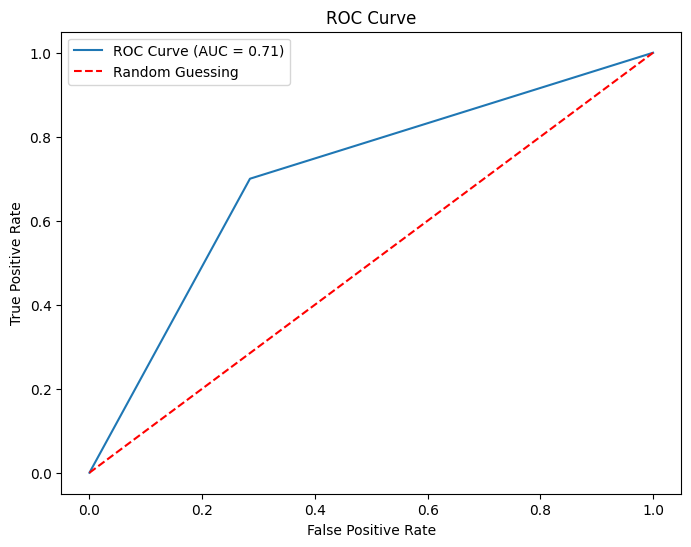

AUC Score: 0.707615894039735


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi ve AUC hesaplama
probs = model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", auc)

3. Karar Ağacı

In [ ]:
# Karar Ağacı Sınıflandırıcı modelini oluştur ve eğit
model_tree = DecisionTreeClassifier(random_state=26)
model_tree.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_tree = model_tree.predict(X_test)
# Model performansını değerlendir
print("Karar Ağacı Sınıflandırıcı Modeli:")
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred_tree))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)


Karar Ağacı Sınıflandırıcı Modeli:
Doğruluk Oranı: 0.6926406926406926

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       151
         1.0       0.55      0.66      0.60        80

    accuracy                           0.69       231
   macro avg       0.67      0.69      0.67       231
weighted avg       0.71      0.69      0.70       231


Confusion Matrix:
[[107  44]
 [ 27  53]]
Sensitivity (Duyarlılık): 0.6625
Specificity (Özgünlük): 0.7086092715231788


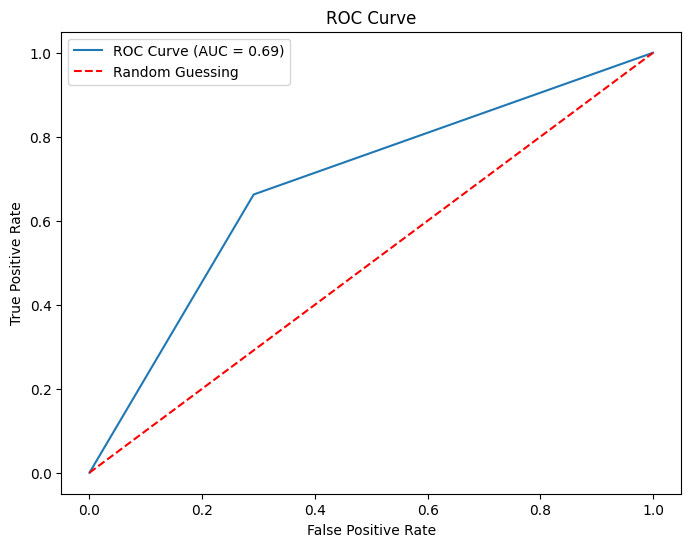

AUC Score: 0.6855546357615895


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi ve AUC hesaplama
probs = model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", auc)

# Naive Bayes Modeli


Sürekli verilere sahip bir veri setiyle çalışırken, veriler arasındaki bağımsızlığı değerlendirmek için genellikle Pearson korelasyon katsayısını kullanmak en yaygın yaklaşımdır. Pearson korelasyon katsayısı, iki sürekli değişken arasındaki doğrusal ilişkiyi ölçer. Değer aralığı -1 ile +1 arasındadır.

In [ ]:
# Pearson korelasyon katsayılarını hesaplama
correlation_matrix = df.corr()

print("Pearson Korelasyon Katsayıları:")
print(correlation_matrix)

Pearson Korelasyon Katsayıları:
                                                    Number of times pregnant  \
Number of times pregnant                                            1.000000   
Plasma glucose concentration a 2 hours in an or...                  0.129459   
Diastolic blood pressure (mm Hg)                                    0.141282   
Triceps skinfold thickness (mm)                                    -0.081672   
2-Hour serum insulin (mu U/ml)                                     -0.073535   
Body mass index (weight in kg/(height in m)^2)                      0.017683   
Diabetes pedigree function                                         -0.033523   
Age (years)                                                         0.544341   
Class variable (0 or 1)                                             0.221898   

                                                    Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
Number of times pregnant               

Bu sonuçlar, veri setindeki her bir değişkenin diğer değişkenlerle olan Pearson korelasyon katsayısını göstermektedir. Pearson korelasyon katsayısı, -1 ile +1 arasında değer alır:

+1'e yaklaşan bir korelasyon katsayısı, iki değişken arasında güçlü bir pozitif doğrusal ilişki olduğunu gösterir.
-1'e yaklaşan bir korelasyon katsayısı, iki değişken arasında güçlü bir negatif doğrusal ilişki olduğunu gösterir.
0'a yaklaşan bir korelasyon katsayısı, iki değişken arasında herhangi bir doğrusal ilişki olmadığını gösterir.
Örneğin, "Number of times pregnant" ve "Age (years)" değişkenleri arasındaki korelasyon katsayısı 0.544341'dir, bu da iki değişken arasında orta düzeyde pozitif bir ilişki olduğunu gösterir.

Ayrıca, "Class variable (0 or 1)" ile diğer değişkenler arasındaki korelasyonlar, sınıflandırma probleminizde sınıf değişkeni ile diğer özellikler arasındaki ilişkiyi gösterir. Bu değerler, belirli bir özellik ile sınıf değişkeni arasındaki ilişki derecesini ölçer.

In [ ]:
# Naive Bayes modelini oluştur ve eğit
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred_nb = model_nb.predict(X_test)

# Model performansını değerlendir
print("Naive Bayes Sınıflandırıcı Modeli Performansı:")
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred_nb))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))
# Sensitivity ve Specificity hesaplama
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity (Duyarlılık):", sensitivity)
print("Specificity (Özgünlük):", specificity)


Naive Bayes Sınıflandırıcı Modeli Performansı:
Doğruluk Oranı: 0.7445887445887446

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       151
         1.0       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Sensitivity (Duyarlılık): 0.6625
Specificity (Özgünlük): 0.7880794701986755


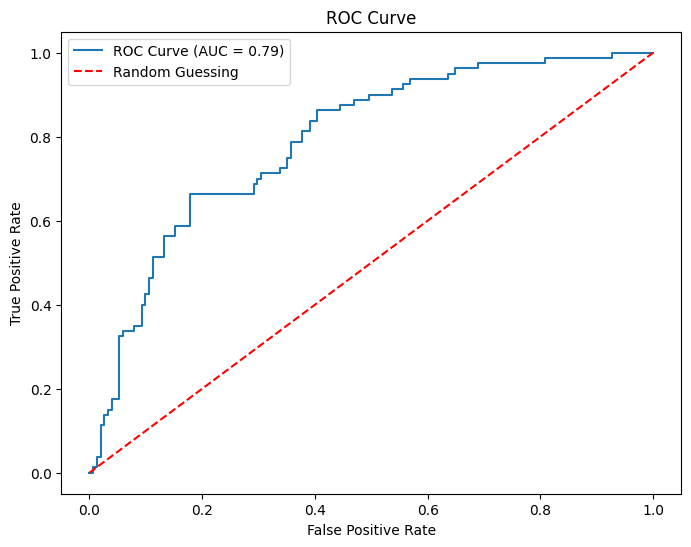

AUC Score: 0.7904801324503311


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi ve AUC hesaplama
probs = model_nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", auc)

ROC eğrisi belirli bir eşik değeri için değil, tüm olası eşik değerleri için performansı gösterir.